# Proyek Analisis Data: Bike Sharing
- **Nama:** Rommi Subiantoro
- **Email:** rommisubiantoro@gmail.com
- **ID Dicoding:** rommi_subiantoro

## Menentukan Pertanyaan Bisnis


1. berapakah banyak jumlah penyewa sepeda pada hari kerja dan hari libur  
2. Bagaimana Performa Penjualan dalam beberapa bulan terakhir
3. Seberapa banyak orang memilih untuk bersepeda dicuaca kabut dibandingkan hujan lebat
4. Pada Musim apa penyewaan sepeda paling sedikit

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("/content/hour.csv")
hour_df = pd.read_csv("/content/hour.csv")

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [ ]:
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [3]:
#memeriksa tiap data
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

In [4]:
#memeriksa missing value
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
#mengecek duplikat
print("duplikat data : ", day_df.duplicated().sum()),
print("duplikat data : ", hour_df.duplicated().sum())

duplikat data :  0
duplikat data :  0


In [6]:
#Memeriksa Parameter Statistik
day_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [7]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
#Menghapus kolom instant dan workingday
hour_df.drop(['instant','workingday'], axis=1, inplace=True)
day_df.drop(['instant','workingday'], axis=1, inplace=True)

In [9]:
# akan merubah tipe data int menjadi category pada kolom 'season', 'mnth', 'holiday', 'weekday', 'weathersit'
columns = ['season', 'mnth', 'holiday', 'weekday', 'weathersit']

for column in columns:
    day_df[column] =  day_df[column].astype("object")
    hour_df[column] =  hour_df[column].astype("object")

In [10]:
#untuk kolom dteday
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])
  day_df[column] = pd.to_datetime(day_df[column])

In [11]:
day_df.rename(columns={'yr':'year','mnth': 'month','hr':'hour','hum':'humidity','cnt':'count'}, inplace=True)

In [12]:
hour_df.rename(columns={'yr':'year','mnth': 'month','hr':'hour','hum':'humidity','cnt':'count'}, inplace=True)

In [13]:
day_df.info()
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      17379 non-null  datetime64[ns]
 1   season      17379 non-null  object        
 2   year        17379 non-null  int64         
 3   month       17379 non-null  object        
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  object        
 6   weekday     17379 non-null  object        
 7   weathersit  17379 non-null  object        
 8   temp        17379 non-null  float64       
 9   atemp       17379 non-null  float64       
 10  humidity    17379 non-null  float64       
 11  windspeed   17379 non-null  float64       
 12  casual      17379 non-null  int64         
 13  registered  17379 non-null  int64         
 14  count       17379 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(5), object(5)
memory usage: 2.

In [14]:
#mengkonversi nilai agar mudah dipahami
day_df.season.replace((1,2,3,4),('spring','summer','fall','winter'),inplace=True),
hour_df.season.replace((1,2,3,4),('spring','summer','fall','winter'),inplace=True),

<ipython-input-14-c8adebedf882>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.season.replace((1,2,3,4),('spring','summer','fall','winter'),inplace=True),
<ipython-input-14-c8adebedf882>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].meth

(None,)

In [15]:
day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('january','february','march','april','may','june','july','august','september','october','november','december'),inplace=True),
hour_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('january','february','march','april','may','june','july','august','september','october','november','december'),inplace=True)

<ipython-input-15-2d3f84f3f19c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.month.replace((1,2,3,4,5,6,7,8,9,10,11,12),('january','february','march','april','may','june','july','august','september','october','november','december'),inplace=True),
<ipython-input-15-2d3f84f3f19c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

In [16]:
day_df.weekday.replace((0,1,2,3,4,5,6),{'sunday':'sunday','monday':'monday','tuesday':'tuesday','wednesday':'wednesday','thursday':'thursday','friday':'friday','saturday':'saturday'}, inplace=True),
hour_df.weekday.replace((0,1,2,3,4,5,6),{'sunday':'sunday','monday':'monday','tuesday':'tuesday','wednesday':'wednesday','thursday':'thursday','friday':'friday','saturday':'saturday'}, inplace=True)

<ipython-input-16-15e20ef57438>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weekday.replace((0,1,2,3,4,5,6),{'sunday':'sunday','monday':'monday','tuesday':'tuesday','wednesday':'wednesday','thursday':'thursday','friday':'friday','saturday':'saturday'}, inplace=True),
<ipython-input-16-15e20ef57438>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the

In [17]:
day_df.year.replace((0,1),{'2011','2012'}, inplace=True),
hour_df.year.replace((0,1),{'2011','2012'}, inplace=True)

<ipython-input-17-9d377188357d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.year.replace((0,1),{'2011','2012'}, inplace=True),
<ipython-input-17-9d377188357d>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [18]:
day_df.weathersit.replace((1,2,3,4),{'Clear','Mist','Light Snow', 'Heavy Rain'}, inplace=True),
hour_df.weathersit.replace((1,2,3,4),{'Clear','Mist','Light Snow', 'Heavy Rain'}, inplace=True)

<ipython-input-18-40b238fec773>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.weathersit.replace((1,2,3,4),{'Clear','Mist','Light Snow', 'Heavy Rain'}, inplace=True),
<ipython-input-18-40b238fec773>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 

In [19]:
#menghitung humidity
day_df['humidity'] = day_df['humidity'] * 100
hour_df['humidity'] = hour_df['humidity'] * 100

In [20]:
# Membuat kolom baru bernama category_days yang menunjukan isi kolom tersebut weekend atau weekdays
weekday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
def get_category_days(weekday):
    if weekday in ["Saturday", "Sunday"]:
        return "weekend"
    else:
        return "weekdays"

hour_df["category_days"] = hour_df["weekday"].apply(get_category_days)
day_df["category_days"] = day_df["weekday"].apply(get_category_days)

In [21]:
def classify_humidity(humidity):
    if humidity < 45:
        return "Terlalu kering"
    elif humidity >= 45 and humidity < 65:
        return "Ideal"
    else:
        return "Terlalu Lembab"

hour_df["humidity_category"] = hour_df["humidity"].apply(classify_humidity)
day_df["humidity_category"] = day_df["humidity"].apply(classify_humidity)

## Exploratory Data Analysis (EDA)

### Explore ...

In [22]:
#explor data day_df dengan melihat rangkumana paramater statistik
day_df.describe(include='all')


,dteday,season,year,month,hour,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,category_days,humidity_category
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
top,NaN,fall,2012,may,NaN,0.0,saturday,Mist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17379,8356
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [23]:
#penyewaan sepeda berdasarkan musim
day_df.groupby(by="season")['count'].sum().sort_values(ascending=False).reset_index().head(10)


,season,count
0,fall,1061129
1,summer,918589
2,winter,841613
3,spring,471348


In [24]:
#melihat penyewaan tiap bulan
day_df.groupby(by="month").agg({
    'registered': 'sum',
    'casual': 'sum'
}).reset_index().head(10)



,month,registered,casual
0,april,208292,60802
1,august,279155,72039
2,december,189343,21693
3,february,136389,14963
4,january,122891,12042
5,july,266791,78157
6,june,272436,73906
7,march,184476,44444
8,may,256401,75285
9,november,218228,36603


In [25]:
day_df.groupby(by=["month", "year"]).agg({
    'registered': 'sum',
    'casual': 'sum'
}).reset_index().head(10)

,month,year,registered,casual
0,april,2011,72524,22346
1,april,2012,135768,38456
2,august,2011,107849,28842
3,august,2012,171306,43197
4,december,2011,78875,8448
5,december,2012,110468,13245
6,february,2011,41973,6242
7,february,2012,94416,8721
8,january,2011,35116,3073
9,january,2012,87775,8969


In [26]:
hour_df.describe(include='all')

,dteday,season,year,month,hour,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,category_days,humidity_category
count,17379,17379,17379,17379,17379.000000,17379.0,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,4,2,12,NaN,2.0,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3
top,NaN,fall,2012,may,NaN,0.0,saturday,Mist,NaN,NaN,NaN,NaN,NaN,NaN,NaN,weekdays,Terlalu Lembab
freq,NaN,4496,8734,1488,NaN,16879.0,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17379,8356
mean,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,62.722884,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,48.000000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,63.000000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,78.000000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,100.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


In [27]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "count": ["sum"]
})

,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


In [28]:
# penyewaan berdasarkan cuaca
hour_df.groupby(by="weathersit")['count'].sum().sort_values(ascending=False).reset_index().head(10)


,weathersit,count
0,Mist,2338173
1,Heavy Rain,795952
2,Clear,158331
3,Light Snow,223


In [29]:
#penyewaan sepeda berdasarkan hari
hour_df.groupby(by="holiday")['count'].sum().sort_values(ascending=False).reset_index().head(10)

,holiday,count
0,0,3214244
1,1,78435


In [30]:
hour_df.groupby(by="weekday")['count'].sum().sort_values(ascending=False).reset_index().head(10)

,weekday,count
0,friday,487790
1,thursday,485395
2,saturday,477807
3,wednesday,473048
4,tuesday,469109
5,monday,455503
6,sunday,444027


In [31]:
all_df = pd.merge(
    left=day_df,
    right=hour_df,
    how="left",

)
all_df.head()

,dteday,season,year,month,hour,holiday,weekday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,category_days,humidity_category
0,2011-01-01,spring,2011,january,0,0,saturday,Mist,0.24,0.2879,81.0,0.0,3,13,16,weekdays,Terlalu Lembab
1,2011-01-01,spring,2011,january,1,0,saturday,Mist,0.22,0.2727,80.0,0.0,8,32,40,weekdays,Terlalu Lembab
2,2011-01-01,spring,2011,january,2,0,saturday,Mist,0.22,0.2727,80.0,0.0,5,27,32,weekdays,Terlalu Lembab
3,2011-01-01,spring,2011,january,3,0,saturday,Mist,0.24,0.2879,75.0,0.0,3,10,13,weekdays,Terlalu Lembab
4,2011-01-01,spring,2011,january,4,0,saturday,Mist,0.24,0.2879,75.0,0.0,0,1,1,weekdays,Terlalu Lembab


In [32]:
all_df.groupby(by=["weekday", "holiday"]).agg({
    "count":"sum"
})

count
weekday   holiday        
friday    0        481296
          1          6494
monday    0        395898
          1         59605
saturday  0        477807
sunday    0        444027
thursday  0        481475
          1          3920
tuesday   0        468096
          1          1013
wednesday 0        465645
          1          7403

In [33]:
all_df.groupby(by="month").agg({
    "count":"sum"
})

,count
month,
april,269094
august,351194
december,211036
february,151352
january,134933
july,344948
june,346342
march,228920
may,331686


In [34]:
all_df.groupby(by="weathersit").agg({
    "count":"sum"

})

,count
weathersit,
Clear,158331
Heavy Rain,795952
Light Snow,223
Mist,2338173


In [35]:
all_df.groupby(by="season").agg({
    "count":"sum"
})

,count
season,
fall,1061129
spring,471348
summer,918589
winter,841613


## Visualization & Explanatory Analysis

### Pertanyaan 1: berapakah banyak jumlah penyewa sepeda pada hari kerja dan hari libur  

   holiday    count     weekday
0        0  3214244  Hari Kerja
1        1    78435  Hari Libur


<ipython-input-36-ce4869f076ce>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weekday', y='count', data=holiday_summary, palette='Blues')


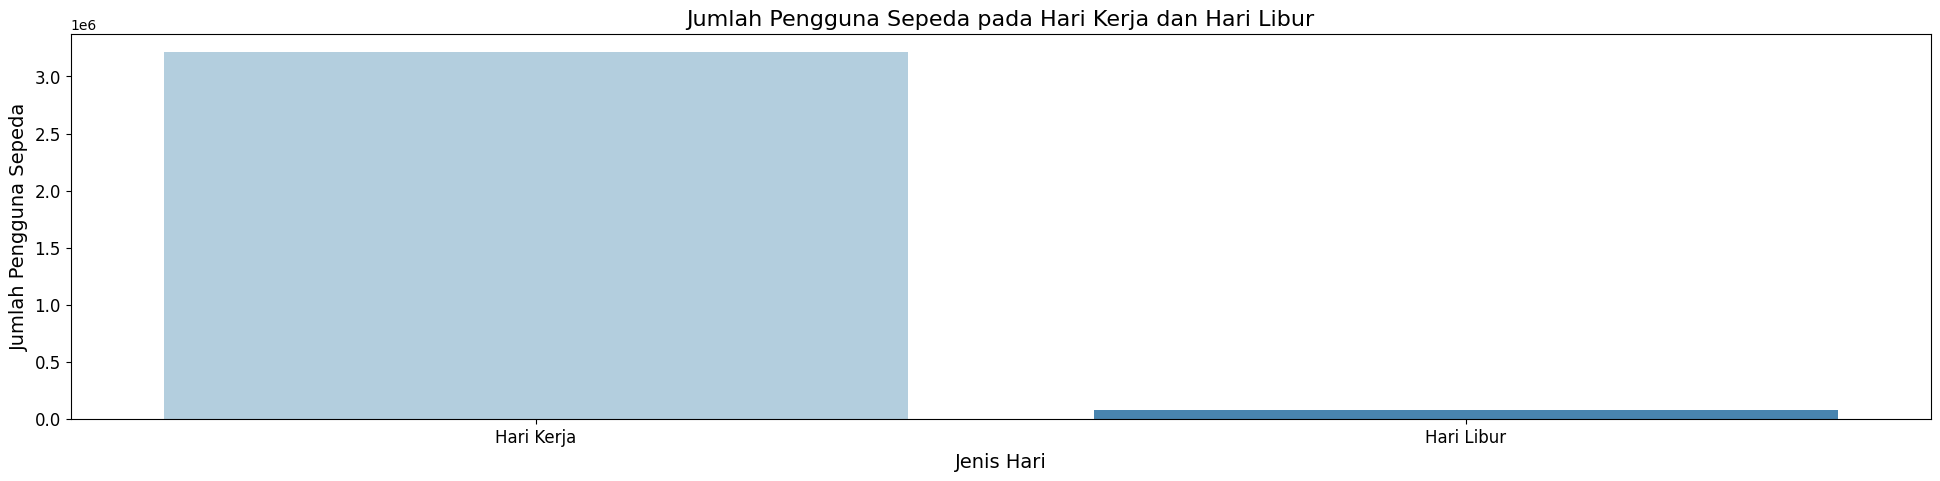

In [36]:
# Mengelompokkan data berdasarkan hari kerja atau hari libur
holiday_summary = all_df.groupby('holiday')['count'].sum().reset_index()
holiday_summary['weekday'] = holiday_summary['holiday'].map({0: 'Hari Kerja', 1: 'Hari Libur'})

# Cek hasil holiday_summary
print(holiday_summary)

# Membuat barplot
plt.figure(figsize=(24,5 ))
sns.barplot(x='weekday', y='count', data=holiday_summary, palette='Blues')

# Menambahkan judul dan label
plt.title("Jumlah Pengguna Sepeda pada Hari Kerja dan Hari Libur", fontsize=16)
plt.xlabel("Jenis Hari", fontsize=14)
plt.ylabel("Jumlah Pengguna Sepeda", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Menampilkan plot
plt.show()

### Pertanyaan 2: Bagaimana Performa Penjualan dalam beberapa bulan terakhir


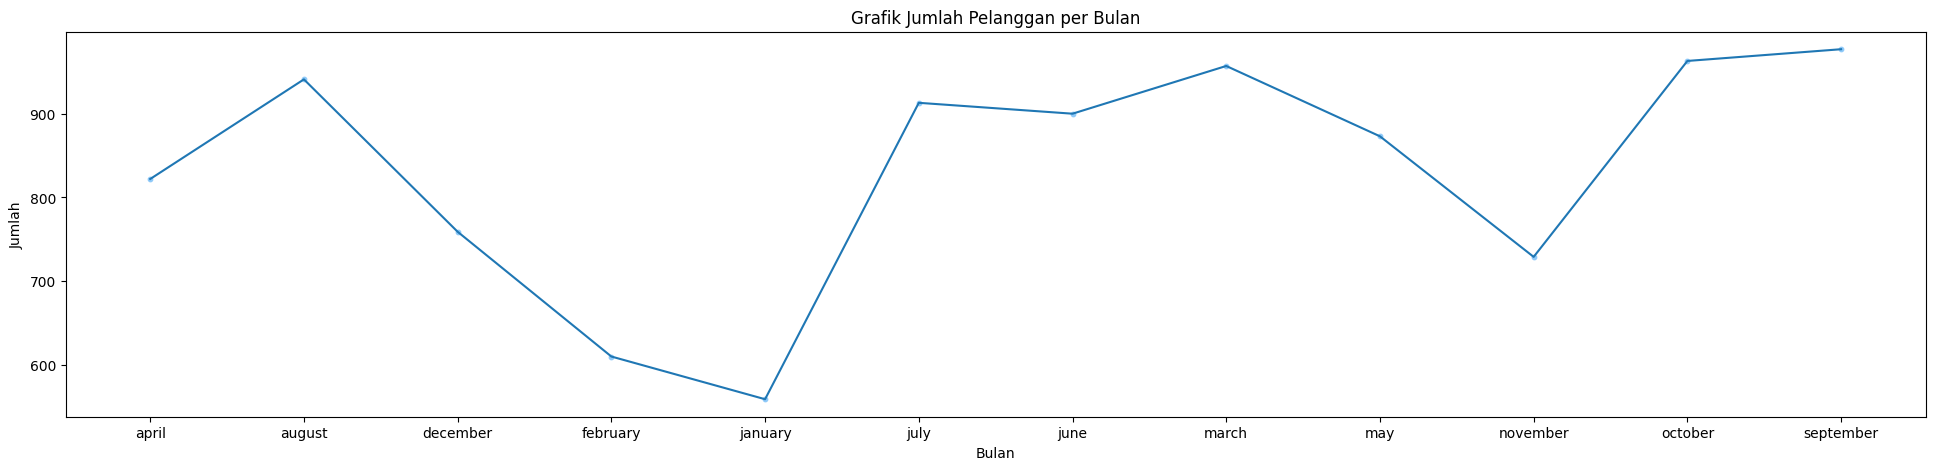

In [37]:
# mmebuat figure dengan ukuran (24, 5)
plt.figure(figsize=(24, 5))

# menghitung jumlah pelanggan maksimum per bulan
monthly_counts = all_df['count'].groupby(all_df['month']).max()

# membuat scatter plot untuk jumlah pelanggan maksimum per bulan, dengan warna biru dan marker 'o'
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=10, marker='o')

# membuat line plot untuk jumlah pelanggan maksimum per bulan
plt.plot(monthly_counts.index, monthly_counts.values)

# penamaan untuk sumbu x
plt.xlabel('Bulan')

# penamaan untuk sumbu y
plt.ylabel('Jumlah')

# buat judul
plt.title('Grafik Jumlah Pelanggan per Bulan')

# menampilkan plot
plt.show()

### Pertanyaan 3: Seberapa banyak orang memilih untuk bersepeda dicuaca kabut dibandingkan hujan lebat

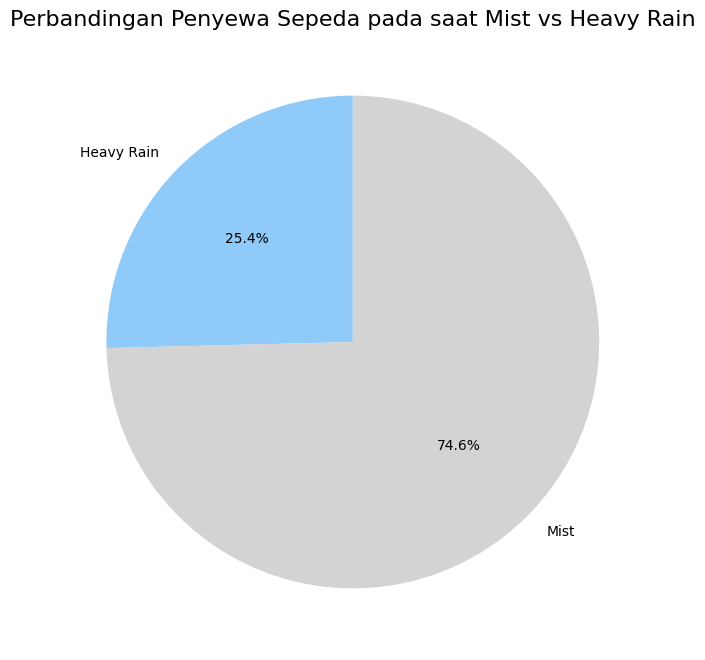

In [38]:
# Mengelompokkan data berdasarkan kondisi cuaca
weather_summary = all_df.groupby('weathersit')['count'].sum().reset_index()

# Menyaring data untuk hanya menampilkan cuaca cerah dan berkabut
weather_filtered = weather_summary[weather_summary['weathersit'].isin(['Mist', 'Heavy Rain'])]

# Membuat pie chart untuk perbandingan penyewa sepeda
plt.figure(figsize=(8, 8))
plt.pie(weather_filtered['count'], labels=weather_filtered['weathersit'], autopct='%1.1f%%', startangle=90, colors=['#90CAF9', '#D3D3D3'])

# Menambahkan judul
plt.title("Perbandingan Penyewa Sepeda pada saat Mist vs Heavy Rain", fontsize=16)

# Menampilkan pie chart
plt.show()

### Pertanyaan 4 : Pada Musim apa penyewaan sepeda paling sedikit




<ipython-input-39-1c395ce8d309>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


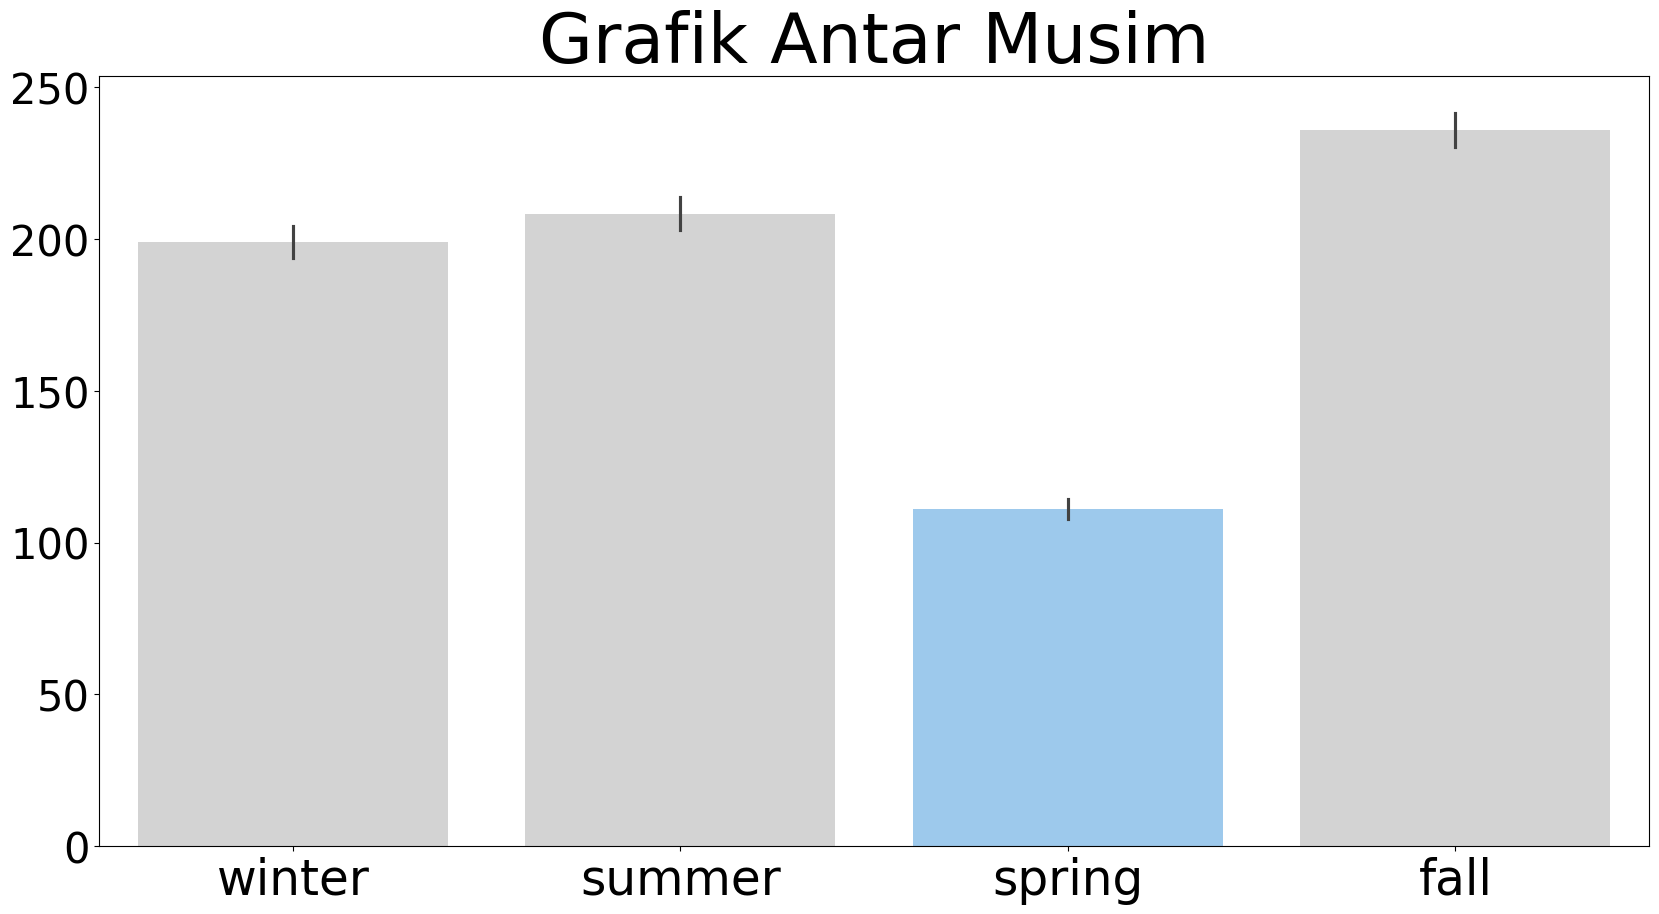

In [39]:
# mengatur warna
colors = ["#D3D3D3", "#D3D3D3", "#90CAF9", "#D3D3D3"]

# membuat subplot dengan 1 baris dan 1 kolom, dengan ukuran (20, 10)
fig, ax = plt.subplots(figsize=(20, 10))

# Buat barplot untuk y="count_cr" dan x="season", menggunakan data=day_df
sns.barplot(
        y="count",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=colors,
        ax=ax
    )
# mengatur judul, label y dan x, serta tick params untuk subplot tersebut
ax.set_title("Grafik Antar Musim", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)

# menampilkan plot
plt.show()

## Analisis Lanjutan (Opsional)

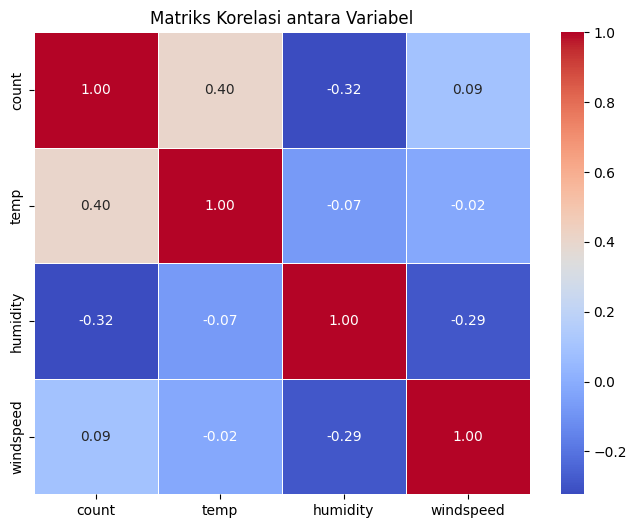

In [40]:

# Menghitung korelasi antar variabel
correlation_matrix = all_df[['count', 'temp', 'humidity', 'windspeed']].corr()

# Membuat heatmap untuk visualisasi korelasi
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriks Korelasi antara Variabel')
plt.show()

In [42]:
# Data preprocessing
current_date = all_df['dteday'].max()
rfm_df = all_df.groupby('registered').agg({
    'dteday': lambda x: (current_date - x.max()).days,  # Recency
    'hour': 'count',  # Frequency
    'count': 'sum'  # Monetary
}).reset_index()

# Mengganti nama kolom
rfm_df.columns = ['registered', 'Recency', 'Frequency', 'Monetary']

# Definisikan aturan untuk segmentasi
def segment_recency(value):
    if value <= 30:  # Dalam 30 hari terakhir
        return 'Recent'
    elif value <= 90:  # Antara 31 dan 90 hari
        return 'Medium'
    else:  # Lebih dari 90 hari
        return 'Inactive'

def segment_frequency(value):
    if value >= 50:  # Sering
        return 'Frequent'
    elif value >= 10:  # Sedang
        return 'Average'
    else:  # Jarang
        return 'Rare'

def segment_monetary(value):
    if value >= 500:  # Pengeluaran tinggi
        return 'High'
    elif value >= 100:  # Pengeluaran sedang
        return 'Medium'
    else:  # Pengeluaran rendah
        return 'Low'

# Terapkan aturan segmentasi
rfm_df['Recency_Segment'] = rfm_df['Recency'].apply(segment_recency)
rfm_df['Frequency_Segment'] = rfm_df['Frequency'].apply(segment_frequency)
rfm_df['Monetary_Segment'] = rfm_df['Monetary'].apply(segment_monetary)

# Buat kolom segmen gabungan
rfm_df['RFM_Segment'] = rfm_df['Recency_Segment'] + '-' + rfm_df['Frequency_Segment'] + '-' + rfm_df['Monetary_Segment']

# Hitung skor total (opsional untuk peringkat)
rfm_df['RFM_Score'] = (
    (rfm_df['Recency'].rank(ascending=False)) +
    (rfm_df['Frequency'].rank(ascending=True)) +
    (rfm_df['Monetary'].rank(ascending=False))
)

# Melihat hasil segmentasi
print(rfm_df.head())


   registered  Recency  Frequency  Monetary Recency_Segment Frequency_Segment  \
0           0       38         24        35          Medium           Average   
1           1        0        201       294          Recent          Frequent   
2           2        1        245       648          Recent          Frequent   
3           3        0        294      1154          Recent          Frequent   
4           4        3        307      1602          Recent          Frequent   

  Monetary_Segment             RFM_Segment  RFM_Score  
0              Low      Medium-Average-Low     1710.5  
1           Medium  Recent-Frequent-Medium     2311.0  
2             High    Recent-Frequent-High     2274.5  
3             High    Recent-Frequent-High     2215.0  
4             High    Recent-Frequent-High     2092.0  


In [43]:
all_df.to_csv('all_df.csv', index=False)

## Conclusion


- berdasarkan gambar diatas dapat kita lihat bahwa penggunaan sepeda terbanyak jatuh kepada hari kerja dengan jumlah penggunaan sekitar 3.0.
- dapat kita liat pada grafik diatas bahwa penurunun jumlah pelanggan turun pada bulan januari dan kembali naik drastis pada bulan juli dan sedikit penurunan pada bulan november dan kembali naik pada bulan september.
- dapat kita liat pada pie chat diatas bahwa perbandingan penyewa sepeda cuaca kabut lebih kecil yang artinya sedikit orang yg ingin menyewa sepeda dibandingkan pada saat cuaca hujan lebat.
- Dari gambar diatas ternyata penyewa sepeda paling sedikit terdapat pada musim semi (spring) dan yang paling banyak pada musim fall.